In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [3]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
start = '2021-08-20'
end = '2022-08-20'

In [14]:
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', start=start, end=end)['Adj Close']), right_index=True, left_index=True, how='outer')
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,AAPL,MSFT,AMD,INTC,NVDA
Date,,,,,
2021-08-20,147.364243,301.832123,104.650002,50.350002,208.018417
2021-08-23,148.875763,302.119751,108.769997,51.531063,219.430618
2021-08-24,148.786270,300.106598,107.650002,52.092552,217.781738
2021-08-25,147.533279,299.501678,108.300003,52.092552,221.978897
2021-08-26,146.717850,296.605896,107.269997,51.434258,220.529861


In [16]:
df.describe()

,AAPL,MSFT,AMD,INTC,NVDA
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,157.261049,293.689310,111.276309,46.208335,227.166338
std,12.567956,24.664720,20.759066,5.405264,47.837936
min,129.879593,241.746857,73.669998,34.520000,145.229996
25%,147.350788,276.246361,96.752499,42.943962,186.995129
50%,157.026390,294.009293,107.044998,47.299822,222.307877
75%,168.421238,308.180855,122.802502,50.541517,264.888855
max,181.259918,340.882782,161.910004,54.501923,333.591766


In [18]:
from IPython.display import Latex, HTML
Latex(r"""\begin{eqnarray}r_t = \frac{AdjClose_t - AdjClose_{t-1}}{AdjClose_{t-1}} = \frac{AdjClose_t}{AdjClose_{t-1}} - 1
\end{eqnarray}""")

<IPython.core.display.Latex object>

([<matplotlib.axis.YTick at 0x7fb36dd456d0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 0, 'MSFT'),
  Text(0, 0, 'AMD'),
  Text(0, 0, 'INTC'),
  Text(0, 0, 'NVDA')])

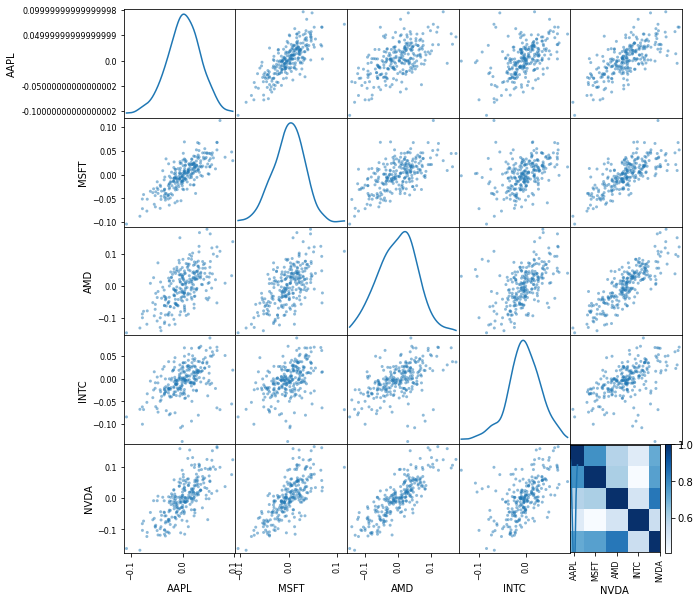

In [19]:
from pandas.plotting import scatter_matrix
rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

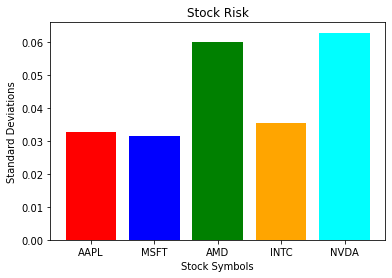

In [20]:
plt.bar(rets.columns, rets.std(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0, 0.5, 'Returns')

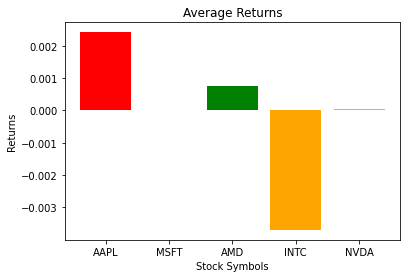

In [21]:
plt.bar(rets.columns, rets.mean(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

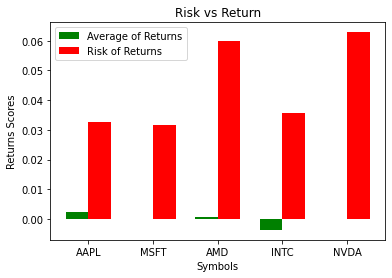

In [22]:
ind = np.arange(5)
width = 0.35       
plt.bar(ind, rets.mean(), width, color = 'g', label='Average of Returns')
plt.bar(ind + width, rets.std(), width, color = 'r', label='Risk of Returns')
plt.ylabel('Returns Scores')
plt.xlabel('Symbols')
plt.title('Risk vs Return')
plt.xticks(ind + width / 2, ('AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA'))
plt.legend(loc='best')
plt.show()

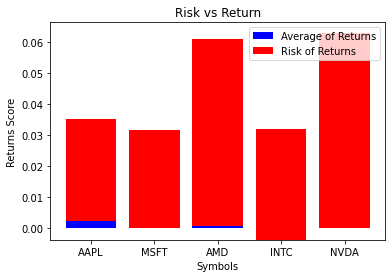

In [23]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
ind = [x for x, _ in enumerate(symbols)]
plt.bar(ind, rets.mean(), width=0.8, label='Average of Returns', color='b')
plt.bar(ind, rets.std(), width=0.8, label='Risk of Returns', color='r', bottom=rets.mean())
plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

Table: Risk vs Expected Returns


,Risk,Expected Returns
AAPL,0.032723,0.002417
MSFT,0.031624,0.000005
AMD,0.059993,0.000761
INTC,0.035582,-0.003694
NVDA,0.062847,0.000037


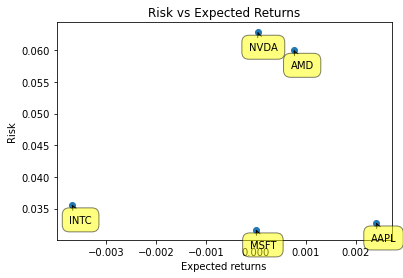

In [24]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk vs Expected Returns')
tables = pd.DataFrame(data=d)
tables  